# Objectives :

<ol>
    <li><strong>Apply Multinomial Naive Bayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>To find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>To find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>

        
   

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
#from collections import Counter

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=70000)
data.head(10)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
5,ca,mrs,grades_3_5,6,1,math_science history_civics,mathematics socialsciences,it end school year routines run course student...,102.50
6,ca,mrs,grades_3_5,0,1,literacy_language math_science,literacy mathematics,sitting still overrated it makes sense opera m...,1418.08
7,ca,ms,grades_3_5,0,0,math_science history_civics,appliedsciences history_geography,it not enough read book write essay connect de...,495.29
8,ca,ms,grades_prek_2,127,1,literacy_language,esl literacy,never society rapidly changed technology invad...,299.99
9,hi,mrs,grades_3_5,41,1,math_science,appliedsciences mathematics,do remember first time saw star wars wall e ro...,479.94


In [3]:
y = data["project_is_approved"].values
X = data.drop(["project_is_approved"],axis=1)

In [4]:
X.head(10)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
5,ca,mrs,grades_3_5,6,math_science history_civics,mathematics socialsciences,it end school year routines run course student...,102.50
6,ca,mrs,grades_3_5,0,literacy_language math_science,literacy mathematics,sitting still overrated it makes sense opera m...,1418.08
7,ca,ms,grades_3_5,0,math_science history_civics,appliedsciences history_geography,it not enough read book write essay connect de...,495.29
8,ca,ms,grades_prek_2,127,literacy_language,esl literacy,never society rapidly changed technology invad...,299.99
9,hi,mrs,grades_3_5,41,math_science,appliedsciences mathematics,do remember first time saw star wars wall e ro...,479.94


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## Encoding  Essay

### BOW 

In [8]:
# Here I am vectorizing the essay column with the help of Bag of words

In [9]:
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)



bow_vectorizer = CountVectorizer(min_df =10,ngram_range=(1,4),max_features=5000)
bow_vectorizer.fit(X_train["essay"].values)



X_train_essay_bow = bow_vectorizer.transform(X_train["essay"].values)
X_cv_essay_bow = bow_vectorizer.transform(X_cv["essay"].values)
X_test_essay_bow = bow_vectorizer.transform(X_test["essay"].values)

print("After vectorizer")

print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

essay_bow_feat = bow_vectorizer.get_feature_names()

(31423, 8) (31423,)
(15477, 8) (15477,)
(23100, 8) (23100,)
After vectorizer
(31423, 5000) (31423,)
(15477, 5000) (15477,)
(23100, 5000) (23100,)


### TF-IDF

In [10]:
#Vectorizing essay column by the help of TF-IDF

In [11]:
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)



idf_vectorizer = TfidfVectorizer(ngram_range=(1,4),min_df=10,max_features=5000)
idf_vectorizer.fit(X_train["essay"].values)



X_train_essay_tfidf = idf_vectorizer.transform(X_train["essay"].values)
X_cv_essay_tfidf = idf_vectorizer.transform(X_cv["essay"].values)
X_test_essay_tfidf = idf_vectorizer.transform(X_test["essay"].values)

print("After vectorizer")




(31423, 8) (31423,)
(15477, 8) (15477,)
(23100, 8) (23100,)
After vectorizer


In [12]:
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_train_essay_tfidf.shape, y_cv.shape)
print(X_train_essay_tfidf.shape, y_test.shape)

(31423, 5000) (31423,)
(31423, 5000) (15477,)
(31423, 5000) (23100,)


In [13]:
essay_tfidf_feat = idf_vectorizer.get_feature_names()

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### One Hot encoding of categorical features 


In [15]:
def ohe(train,cv,test,col):
    vectorizer = CountVectorizer() # Here I am using Bag of words , since it helps in one hot encoding
    vectorizer.fit(train[col].values) # Fitting the CountVectorizer on the train data then transforming train,cv and test

    X_train_col = vectorizer.transform(train[col].values) 
    X_cv_col = vectorizer.transform(cv[col].values)
    X_test_col = vectorizer.transform(test[col].values)
    
    return X_train_col,X_cv_col,X_test_col,vectorizer.get_feature_names() 
    # return the 3 datasets along with features_names which will help us in finding the top features ahead 



In [16]:
# School State
X_train_state_ohe,X_cv_state_ohe,X_test_state_ohe,state_feat = ohe(X_train,X_cv,X_test,"school_state")
# Teacher Prefix
X_train_pref_ohe,X_cv_pref_ohe,X_test_pref_ohe,pref_feat = ohe(X_train,X_cv,X_test,"teacher_prefix")
# Project_grade_category
X_train_pgc_ohe,X_cv_pgc_ohe,X_test_pgc_ohe,pgc_feat = ohe(X_train,X_cv,X_test,"project_grade_category")

#clean_categories
X_train_cc_ohe,X_cv_cc_ohe,X_test_cc_ohe,cc_feat = ohe(X_train,X_cv,X_test,"clean_categories")

#clean_subcategories
X_train_cs_ohe,X_cv_cs_ohe,X_test_cs_ohe,cs_feat = ohe(X_train,X_cv,X_test,"clean_subcategories")



#### Preprocessing numerical features 

In [92]:
from sklearn.preprocessing import Normalizer
def norm(train,cv,test,col):
    normalizer = Normalizer()
    normalizer.fit(X_train[col].values.reshape(1,-1))
    X_train_col_norm = normalizer.transform(X_train[col].values.reshape(1,-1))
    X_cv_col_norm = normalizer.transform(X_cv[col].values.reshape(1,-1))
    X_test_col_norm = normalizer.transform(X_test[col].values.reshape(1,-1))

    return X_train_col_norm.reshape(-1,1),X_cv_col_norm.reshape(-1,1),X_test_col_norm.reshape(-1,1)


In [93]:
#Price
X_train_price_norm,X_cv_price_norm,X_test_price_norm = norm(X_train,X_cv,X_test,"price")
#teacher_number_of_previously_posted_projects
X_train_pp_norm,X_cv_pp_norm,X_test_pp_norm = norm(X_train,X_cv,X_test,"teacher_number_of_previously_posted_projects")

#### Concatinating all the features

In [87]:
from scipy.sparse import hstack

In [88]:
bow_features = essay_bow_feat+state_feat + pref_feat+pgc_feat+cc_feat+ cs_feat 
bow_features.extend(["Price","teacher_number_of_previously_posted_projects"])

In [89]:
tfidf_features = essay_tfidf_feat+state_feat + pref_feat+pgc_feat+cc_feat+ cs_feat 
tfidf_features.extend(["Price","teacher_number_of_previously_posted_projects"])

In [90]:
print("total features with BOW essay", len(bow_features))
print("total features with TFIDF",len(tfidf_features))

total features with BOW essay 5101
total features with TFIDF 5101


#### BOW Matrix

In [94]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# Concatenating features with Bag of words of essay
from scipy.sparse import hstack
# BOW 
X_tr_1 = hstack((X_train_essay_bow,X_train_state_ohe,X_train_pref_ohe,X_train_pgc_ohe,X_train_cc_ohe,X_train_cs_ohe,X_train_price_norm,X_train_pp_norm)).tocsr()
X_cv_1 = hstack((X_cv_essay_bow,X_cv_state_ohe,X_cv_pref_ohe,X_cv_pgc_ohe,X_cv_cc_ohe,X_cv_cs_ohe,X_cv_price_norm,X_cv_pp_norm)).tocsr()
X_te_1 = hstack((X_test_essay_bow,X_test_state_ohe,X_test_pref_ohe,X_test_pgc_ohe,X_test_cc_ohe,X_test_cs_ohe,X_test_price_norm,X_test_pp_norm)).tocsr()

print("Final Data matrix BOW")
print(X_tr_1.shape, y_train.shape)
print(X_cv_1.shape, y_cv.shape)
print(X_te_1.shape, y_test.shape)


Final Data matrix BOW
(31423, 5101) (31423,)
(15477, 5101) (15477,)
(23100, 5101) (23100,)


#### TF-IDF Matrix

In [95]:
#Concatenating with TF-IDF of essay
X_tr_2 = hstack((X_train_essay_tfidf,X_train_state_ohe,X_train_pref_ohe,X_train_pgc_ohe,X_train_cc_ohe,X_train_cs_ohe,X_train_price_norm,X_train_pp_norm)).tocsr()
X_cv_2 = hstack((X_cv_essay_tfidf,X_cv_state_ohe,X_cv_pref_ohe,X_cv_pgc_ohe,X_cv_cc_ohe,X_cv_cs_ohe,X_cv_price_norm,X_cv_pp_norm)).tocsr()
X_te_2 = hstack((X_test_essay_tfidf,X_test_state_ohe,X_test_pref_ohe,X_test_pgc_ohe,X_test_cc_ohe,X_test_cs_ohe,X_test_price_norm,X_test_pp_norm)).tocsr()

print("Final Data matrix TF-IDF")
print(X_tr_2.shape, y_train.shape)
print(X_cv_2.shape, y_cv.shape)
print(X_te_2.shape, y_test.shape)


Final Data matrix TF-IDF
(31423, 5101) (31423,)
(15477, 5101) (15477,)
(23100, 5101) (23100,)


In [97]:
# We have to make a list of all the features if we have to find top features , it is important to order them accroding to our 
# the order of our sparse matrix 
# Our sparse matrix have 5101 columns 
# 5101(total cols) = 5000(essay bow features) + 99(categorical features) + 2 (price and previous project)
# BOW
bow_features = essay_bow_feat+state_feat + pref_feat+pgc_feat+cc_feat+ cs_feat 
bow_features.extend(["Price","teacher_number_of_previously_posted_projects"])

# TF-IDF
# 5101(total cols) = 5000(essay tfidf features) + 99(categorical features) + 2 (price and previous project)

tfidf_features = essay_tfidf_feat+state_feat + pref_feat+pgc_feat+cc_feat+ cs_feat 
tfidf_features.extend(["Price","teacher_number_of_previously_posted_projects"])


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [99]:
# Using Gridsearch

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

train_auc = []
cv_auc = []
parameters = {"alpha":[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}
est = MultinomialNB(class_prior=[0.5,0.5])
# Mentioning our estimator 



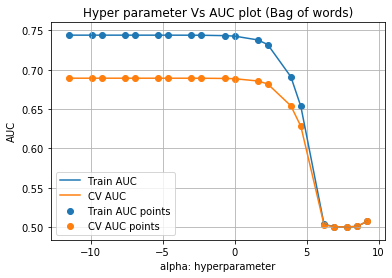

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.091849,0.005826,0.007850,0.001846,1e-05,{'alpha': 1e-05},0.693635,0.696059,0.700842,0.694614,...,0.744551,0.743913,0.745900,0.741532,0.744672,0.743547,0.743680,0.745448,0.743876,0.00131
1,0.089641,0.005909,0.007428,0.001718,5e-05,{'alpha': 5e-05},0.693635,0.696059,0.700843,0.694614,...,0.744551,0.743913,0.745900,0.741532,0.744672,0.743547,0.743680,0.745448,0.743876,0.00131
2,0.091127,0.005255,0.007699,0.001826,0.0001,{'alpha': 0.0001},0.693635,0.696058,0.700843,0.694614,...,0.744551,0.743913,0.745900,0.741532,0.744672,0.743547,0.743680,0.745448,0.743876,0.00131
3,0.091888,0.004882,0.008217,0.001737,0.0005,{'alpha': 0.0005},0.693634,0.696058,0.700843,0.694614,...,0.744550,0.743912,0.745899,0.741531,0.744671,0.743546,0.743679,0.745448,0.743875,0.00131
4,0.090499,0.006418,0.009045,0.002168,0.001,{'alpha': 0.001},0.693633,0.696057,0.700845,0.694610,...,0.744549,0.743912,0.745898,0.741531,0.744671,0.743545,0.743679,0.745447,0.743875,0.00131


In [100]:
## BOW 
clf_1 = GridSearchCV(est,parameters,cv=10,scoring = "roc_auc",return_train_score= True)
clf_1.fit(X_tr_1,y_train)

results = pd.DataFrame.from_dict(clf_1.cv_results_)
results = results.sort_values(["param_alpha"])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']
alpha = np.log(alpha.astype("float"))

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (Bag of words)")
plt.grid()
plt.show()

results.head()

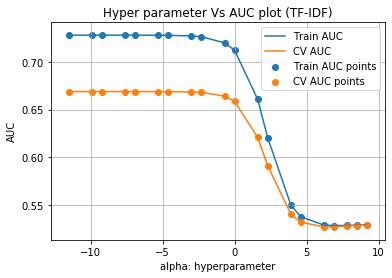

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.090343,0.004610,0.009035,0.001943,1e-05,{'alpha': 1e-05},0.675069,0.675830,0.671004,0.673519,...,0.726974,0.727949,0.729355,0.726916,0.729448,0.727230,0.727609,0.730249,0.727980,0.001247
1,0.097969,0.002983,0.008360,0.001322,5e-05,{'alpha': 5e-05},0.675069,0.675828,0.671005,0.673517,...,0.726974,0.727948,0.729354,0.726915,0.729447,0.727229,0.727608,0.730248,0.727979,0.001247
2,0.092999,0.003511,0.007412,0.000836,0.0001,{'alpha': 0.0001},0.675069,0.675829,0.671004,0.673516,...,0.726973,0.727948,0.729353,0.726914,0.729446,0.727228,0.727607,0.730247,0.727978,0.001247
3,0.086331,0.011371,0.007531,0.001497,0.0005,{'alpha': 0.0005},0.675060,0.675825,0.671007,0.673502,...,0.726967,0.727940,0.729347,0.726907,0.729440,0.727221,0.727601,0.730240,0.727971,0.001247
4,0.094185,0.004916,0.008767,0.001753,0.001,{'alpha': 0.001},0.675059,0.675823,0.670999,0.673491,...,0.726960,0.727931,0.729339,0.726898,0.729433,0.727213,0.727593,0.730232,0.727963,0.001247


In [102]:
# Tf-IDF
clf_2 = GridSearchCV(est,parameters,cv=10,scoring = "roc_auc",return_train_score= True)
clf_2.fit(X_tr_2,y_train)

results = pd.DataFrame.from_dict(clf_2.cv_results_)
results = results.sort_values(["param_alpha"])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']
alpha = np.log(alpha.astype("float"))

plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (TF-IDF)")
plt.grid()
plt.show()

results.head()

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [103]:
# Best alpha of BOW
best_alpha_1 = clf_1.best_estimator_.alpha

# Best alpha of TF-IDF
best_alpha_2 = clf_2.best_estimator_.alpha

In [104]:
from sklearn.metrics import roc_curve , auc 

est_1 = MultinomialNB(alpha= best_alpha_1,class_prior=[0.5,0.5])

# est_1 = classifier trained on BOW essay data
est_1.fit(X_tr_1,y_train)

y_train_pred_bow = est_1.predict(X_tr_1)
y_test_pred_bow = est_1.predict(X_te_1)



In [105]:
#TFIDF
#est_2 = classifier trained on TF-IDF essay data
est_2 = MultinomialNB(alpha  = best_alpha_2,class_prior=[0.5,0.5])

est_2.fit(X_tr_2,y_train)

y_train_pred_tfidf = est_2.predict(X_tr_2)
y_test_pred_tfidf = est_2.predict(X_te_2)



In [106]:
y_train_pred_bow_pp = est_1.predict_proba(X_tr_1)[:,1]
y_test_pred_bow_pp = est_1.predict_proba(X_te_1)[:,1]

y_train_pred_tfidf_pp = est_2.predict_proba(X_tr_2)[:,1]
y_test_pred_tfidf_pp= est_2.predict_proba(X_te_2)[:,1]

### ROC curve 



In [107]:
from sklearn.metrics import roc_curve,auc

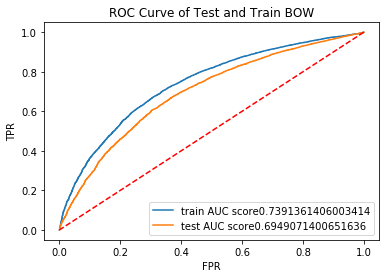

In [108]:
fpr_tr,tpr_tr,__tr = roc_curve(y_train,y_train_pred_bow_pp)
fpr_te,tpr_te,__te = roc_curve(y_test,y_test_pred_bow_pp)
bow_test_auc = auc(fpr_tr,tpr_tr)

plt.title("ROC Curve of Test and Train BOW" )
plt.plot(fpr_tr,tpr_tr,label = "train AUC score" + str(auc(fpr_tr,tpr_tr)))
plt.plot(fpr_te,tpr_te,label = "test AUC score"+ str(auc(fpr_te,tpr_te)))
plt.legend()
plt.plot([1,0],[1,0],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()



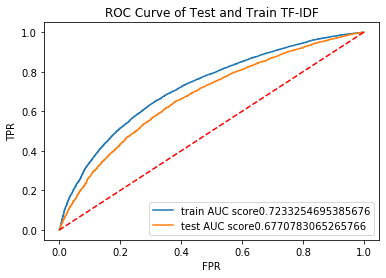

In [109]:
fpr_tr,tpr_tr,__tr = roc_curve(y_train,y_train_pred_tfidf_pp)
fpr_te,tpr_te,__te = roc_curve(y_test,y_test_pred_tfidf_pp)

tfidf_test_auc = auc(fpr_tr,tpr_tr)
plt.title("ROC Curve of Test and Train TF-IDF" )
plt.plot(fpr_tr,tpr_tr,label = "train AUC score" + str(auc(fpr_tr,tpr_tr)))
plt.plot(fpr_te,tpr_te,label = "test AUC score"+ str(auc(fpr_te,tpr_te)))
plt.legend()
plt.plot([1,0],[1,0],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()



# Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix

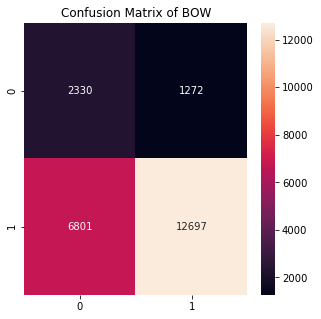

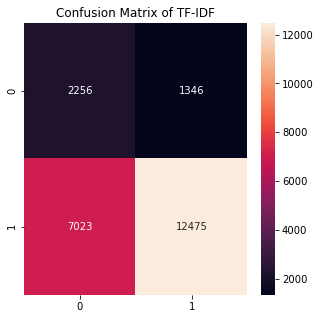

In [111]:

array = confusion_matrix(y_test,y_test_pred_bow)
df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix of BOW")
sns.heatmap(df_cm,annot =True,fmt = "g") # font size

plt.show()


array = confusion_matrix(y_test,y_test_pred_tfidf)
df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix of TF-IDF")
sns.heatmap(df_cm,annot =True,fmt = "g") # font size

plt.show()

# Top 20 features

In [141]:
neg_b = est_1.feature_log_prob_[0,:].argsort()[::-1]
pos_b = est_1.feature_log_prob_[1,:].argsort()[::-1]

#TF-IDF
neg_t = est_2.feature_log_prob_[0,:].argsort()[::-1]
pos_t = est_2.feature_log_prob_[1,:].argsort()[::-1]

In [142]:
print("Top 20 Features of Approved Projects and Not Approved projects (BOW)")
print("Not Approved Projects")
print(np.take(bow_features, neg_b[:10]))
print("Approved Projects")
print(np.take(bow_features, pos_b[:10]))

print("#"*50)

print("Top 20 Features of Approved Projects and Not Approved projects (tfidf)")

print("Not Approved Projects")
print(np.take(tfidf_features, neg_t[:10]))
print("Approved Projects")
print(np.take(tfidf_features, pos_t[:10]))

Top 20 Features of Approved Projects and Not Approved projects (BOW)
Not Approved Projects
['students' 'school' 'learning' 'my' 'classroom' 'not' 'learn' 'they'
 'the' 'help']
Approved Projects
['students' 'school' 'my' 'learning' 'classroom' 'the' 'not' 'they'
 'my students' 'learn']
##################################################
Top 20 Features of Approved Projects and Not Approved projects (tfidf)
Not Approved Projects
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8']
Approved Projects
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing'
 'health_sports']


### Summary

In [118]:
from prettytable import PrettyTable


pt = PrettyTable()
pt.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "Test-AUC"]

pt.add_row(["BOW", "Naive Bayes", best_alpha_1),bow_test_auc ])
pt.add_row(["TFIDF", "Naive Bayes", float(best_alpha_2), tfidf_test_auc])

print(pt)

+------------+-------------+-----------------------+--------------------+
| Vectorizer |    Model    | Alpha:Hyper Parameter |      Test-AUC      |
+------------+-------------+-----------------------+--------------------+
|    BOW     | Naive Bayes |         1e-05         | 0.7391361406003414 |
|   TFIDF    | Naive Bayes |         5e-05         | 0.7233254695385676 |
+------------+-------------+-----------------------+--------------------+
